# Exercise 4

*This exercise was generated from a Jupyter notebook.  You can download the notebook [here](e04.ipynb).*

In [23]:
# Standard library stuff
import glob
import re

# NumPy of course
import numpy as np

# Pandas, conventionally imported as pd
import pandas as pd

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Seaborn makes plots pretty!
import seaborn as sns

# PyBeeswarm for some better data display
import beeswarm

# To use NCBI Entrez to query NCBI's databases
import Bio.Entrez

# To read in records from Entrez
import Bio.SeqIO

# To create sequence records
import Bio.SeqRecord

# To run BLAST searches using NCBI's resources
import Bio.Blast.NCBIWWW

# To read and interpret BLAST-XML files
import Bio.SearchIO

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

# Set JB's favorite Seaborn settings
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18, 
    'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)

## Problem 4.1: Setting up a GitHub account
Having a local repository is useful, to be sure, but having a remote repository really brings you some power.  Importantly, it allows very easy sharing and logging of work done my many people.  Secondly, having a remote repository gets you extensive backups for free.  With the exceptions of presentations for talks, I do all of my work within Git repositories hosted at [GitHub](http://github.com/), one of the most popular hosting services.  [BitBucket](http://bitbucket.org/) is another popular hosting service.

**If your lab does not use remote version control repositories, start evangelizing, and get one!**

In this problem, you will set up your own GitHub account and host the repo you set up for bootcamp there.  For the rest of bootcamp, you should keep your work under version control.

*Note: you usually do not keep outputs of code under version control unless it serves as a basis for comparison for unit tests.  You also don't keep things you can't edit, like images, under version control.  The repositories can tend to get very large.*

**a)** Go to the [GitHub website](http://github.com/) and set up an account.   Make sure you get an academic account that lets you have free private accounts.

**b)** Follow the instructions [here](http://swcarpentry.github.io/git-novice/07-github.html) to set up your first repository (bootcamp).  You will probably want this repository to be private.

**c)** Edit your `README.md` file with a description of what your bootcamp repository is all about.  Then `add` and `commit` your changes.

**d)** Push your changes to the remote repository.

    git push origin master
    
**e)** Now try to pull from the repository.

    git pull
    
This pulls in all changes that have been made.  Since your local versions now match what is in the remote repo, `git` will tell you that everything is up to date.

### Problem 4.1: solution
It's hard to really write a solution for this.  Just follow the instructions from the [GitHub website](http://github.com/) and get 'er done!

## Problem 4.2: Long-term trends in hybridization of Darwin finches
[Peter and Rosemary Grant](https://en.wikipedia.org/wiki/Peter_and_Rosemary_Grant) have been working on the Galápagos island of Daphne for over forty years.  During this time, they have collected lots and lots of data about physiological features of finches.  Last year, they published a book with a summary of some of their major results (Grant P. R., Grant B. R., *Data from: 40 years of evolution. Darwin's finches on Daphne Major Island*, Princeton University Press, 2014). They made their data from the book publicly available via the [Dryad Digital Repository](http://dx.doi.org/10.5061/dryad.g6g3h).

We will investigate their measurements of beak depth (the distance, top to bottom, of a closed beak) and beak length (base to tip on the top) of Darwin's finches.  We will look at data from two species, *Geospiza fortis* and *Geospiza scandens*.  The Grants provided data on the finches of Daphne for the years 1973, 1975, 1987, 1991, and 2012.  You can download these files as they appear in the Dryad repo (though I changed file names and supplied a reference at the top of each file) [here](http://bois.caltech.edu/bootcamp/grant.zip).

**a)** Load each of the files `1973.csv`, `1975.csv`, `1987.csv`, `1991.csv`, and  `2012.csv` into separate Pandas `DataFrame`s.  You might want to inspect the file first to make sure you know what character the comments start with and if there is a header row.

**b)** We would like to merge these all into one `DataFrame`.  The problem is that they have different header names, and only the 1973 file has a year entry (called `yearband`).  This is common with real data.  It is often a bit messy and requires some munging.  

>1. First, change the name of the `yearband` column of the 1973 data to `year`.  Also, make sure the year format is four digits, not two!  
>2. Next, add a `year` column to the other four `DataFrame`s.  You want tidy data, so each row in the `DataFrame` should have an entry for the year.
>3. Change the column names so that all the `DataFrame`s have the same column names.  I would choose column names
>
>    `['band', 'species', 'beak length (mm)', 'beak depth (mm)', 'year']`
>
>4. Concatenate the `DataFrame`s into a singe `DataFrame`.

**c)** The `band` fields gives the number of the band on the bird's leg that was used to tag it.  Are some birds counted twice?  Are they counted twice in the same year?  Do you think you should drop duplicate birds from the same year?  How about different years?  My opinion is that you should drop dupicate birds from the same year and keep the others, but I would be open to discussion on that.  To practice your Pandas skills, though, let's delete only duplicate birds from the same year from the `DataFrame`.  When you have make this `DataFrame`, save it as a CSV file.

*Hint*: The `DataFrame` methods `duplicated()` and `drop_duplicates()` will be useful.

**d)** Plot a histogram of beak depths of *Geospiza fortis* specimens measured in 1987.  Plot a histogram of the beak depths of *Geospiza scandens* from the same year.  These histograms should be on the same plot.  On another plot, plot a histogram of beak lengths for the two species in 1987.  Do you see a striking phenotypic difference?

**e)** Perhaps a more informative plot is to plot the measurement of each bird's beak as a point in the beak depth-beak length plane.  For the 1987 data, plot beak depth vs. beak width for *Geospiza fortis* as blue dots, and for *Geospiza scandens* as red dots.  Can you see the species demarcation?

**f)** Do part (e) again for all years.  Describe what you see.  Do you see the species coming together (presumably as a result of hybridization)?  In your plots, make sure all plots have the same range on the axes.

### Problem 4.2: solution
Upon inspecting the files, we see that the comment character is, as usual, `#`.  There is also a header row in each file, as the first row, so they files are pretty standard.  It is important to note that not all of the column headings are the same, but the units of length in the measurements is millimeters.  Let's go ahead and load them in!  We will load them into a list.  I have all my files stored in the directory `../data/grant`.  I will use the `glob` module to load in all the `.csv` files in that directory.

In [24]:
# Get list of CSV files
csv_list = glob.glob('../data/grant/*.csv')

# Initialize list of DataFrames
df_list = []

# Load in each sequentially.
for csv_file in csv_list:
    # Read in DataFrame
    df = pd.read_csv(csv_file, comment='#')
    
    # Place in list
    df_list.append(df)

Let's take a quick look at the first entry in the list, just to make sure it loaded ok.

In [25]:
df_list[0].head()

,band,species,yearband,beak length,beak depth
0,20123,fortis,73,9.25,8.05
1,20126,fortis,73,11.35,10.45
2,20128,fortis,73,10.15,9.55
3,20129,fortis,73,9.95,8.75
4,20133,fortis,73,11.55,10.15


Looks good!

**b)** Before moving on, we need to know what year is associated with each `DataFrame`.  Fortunately, `glob.glob` gives us the result back in order, so we can extract the year from the file names.

In [26]:
# Initialize years
years = []
for csv_file in csv_list:
    years.append(int(csv_file[-8:-4]))

Let's check to make sure we got them!

In [27]:
years

[1973, 1975, 1987, 1991, 2012]

Looks good.  Now, we'll proceed with the steps we need to take to clean things up.  First, we'll check the `'yearband'` column in the `DataFrame` from 1973 to `'year'`, and change its year to from `73` to `1973`.

In [28]:
# Rename to year
df_list[0] = df_list[0].rename(columns={'yearband': 'year'})

# No worries about Y2K
df_list[0]['year'] += 1900

# Check it out
df_list[0].head()

,band,species,year,beak length,beak depth
0,20123,fortis,1973,9.25,8.05
1,20126,fortis,1973,11.35,10.45
2,20128,fortis,1973,10.15,9.55
3,20129,fortis,1973,9.95,8.75
4,20133,fortis,1973,11.55,10.15


Great!  Let's proceed to add a `year` column to all of the other `DataFrame`s.  As we do it, we'll just reassign the 1973 year in that `DataFrame`, but that's no big deal.

In [29]:
for i, df in enumerate(df_list):
    df_list[i]['year'] = np.ones(len(df), dtype=int) * years[i]

Let's check one to make sure it makes sense.

In [30]:
df_list[3].head()

,band,species,blength,bdepth,year
0,2639,fortis,10.30,8.95,1991
1,2666,fortis,12.81,9.30,1991
2,2753,fortis,10.89,10.35,1991
3,2776,fortis,11.30,10.00,1991
4,4229,fortis,10.05,8.62,1991


Looks good.  Now, we need to change the column names so they are all the same for the respective `DataFrame`s.  We have few enough `DataFrame`s that we could do that by hand, but it is more instructive (and re-usable) if we automate it.  We will write a function to rename the columns.  It first sniffs out which column should be `'band'`, which should be `'species'`, and so on.  We can do this with Pandas's convenient `.str` methods, which enable us to use string methods on many entries at once.  This is perhaps best seen by example.

In [31]:
# Choose a DataFrame to try it on.
df = df_list[3]

# Look at the columns
df.columns

Index(['band', 'species', 'blength', 'bdepth', 'year'], dtype='object')

Now, if we are interested in the beak length column, we want to find a column heading that contains `'len'`, since pretty much anything that is about beak length would have the substring.  We can use the convenient `str.contains()` method.

In [32]:
# See which column had 'len' in it
df.columns.str.contains('len')

array([False, False,  True, False, False], dtype=bool)

Now, we can slice out the column heading that has `'len'` in it.

In [33]:
df.columns[df.columns.str.contains('len')]

Index(['blength'], dtype='object')

Finally, we just want the string, so we do

In [34]:
df.columns[df.columns.str.contains('len')][0]

'blength'

We'll use this to identify the current column headings and then change them to what we want.

In [35]:
def rename_cols(df):
    """Rename columns so all DataFrames have same column headings."""
    
    # Sniff out the key names from names that are close
    band_key = df.columns[df.columns.str.contains('and')][0]
    species_key = df.columns[df.columns.str.contains('ecies')][0]
    length_key = df.columns[df.columns.str.contains('len')][0]
    depth_key = df.columns[df.columns.str.contains('dep')][0]
    year_key = df.columns[df.columns.str.contains('year')][0]
    
    # Rename the columns using renaming dictionary
    return df.rename(columns={band_key: 'band',
                              species_key: 'species',
                              depth_key: 'beak depth (mm)',
                              length_key: 'beak length (mm)',
                              year_key: 'year'})

Now, we can loop through the `DateFrame`s and rename the columns.

In [36]:
for i, df in enumerate(df_list):
    df_list[i] = rename_cols(df)
    
# Check the result
df_list[3].head()

,band,species,beak length (mm),beak depth (mm),year
0,2639,fortis,10.30,8.95,1991
1,2666,fortis,12.81,9.30,1991
2,2753,fortis,10.89,10.35,1991
3,2776,fortis,11.30,10.00,1991
4,4229,fortis,10.05,8.62,1991


Finally, we do the concatenation using `pd.concat()`.  We want to ignore the indices because they are not important identifiers.

In [37]:
df = pd.concat(df_list, axis=0, ignore_index=True)

# Take a look
df

,band,beak depth (mm),beak length (mm),species,year
0,20123,8.05,9.25,fortis,1973
1,20126,10.45,11.35,fortis,1973
2,20128,9.55,10.15,fortis,1973
3,20129,8.75,9.95,fortis,1973
4,20133,10.15,11.55,fortis,1973
5,20136,9.85,11.15,fortis,1973
6,20138,8.85,10.05,fortis,1973
7,20142,10.15,11.25,fortis,1973
8,20143,8.15,9.15,fortis,1973
9,20146,8.55,9.25,fortis,1973


Great!  We now have one convenient `DataFrame` to work with.

**c)** First, let's look for duplicate band numbers.  There are many, so we'll just write out how many.  The `df.duplicated()` method returns True for each row if it is a duplicate.  We will get all duplicates in the `'band'` column, and then get the unique values in the list of all duplicated.  This will tell us how many birds were measured more than once.

In [38]:
#Stats about how many birds were measured more than once
print('There were', len(df['band'][df['band'].duplicated()].unique()), 
      'birds that were measured more than once.')
print('There were', len(df['band'].unique()), 'total birds measured.')

There were 350 birds that were measured more than once.
There were 1954 total birds measured.


So, most birds were only measured once.  Nonetheless, let's eliminate duplicates of birds that were measured twice.  When we drop the duplicates, we will keep the first measurement.

In [39]:
# Drop all rows with matching year and band (keep first)
df = df.drop_duplicates(subset=['year', 'band'])

Finally, we will save the `DataFrame` as a CSV file using the `df.to_csv()` method.  We do not want to print the indices (they are meaningless).

In [40]:
df.to_csv('grant_finch_data.csv', index=False)

**d)**  Let's just go ahead and generate the plot.  A trick is that `plt.hist()` prefers NumPy arrays and sometimes gets tripped up with `DataFrame`s, so we need to pull out the values using the `.values` attribute.

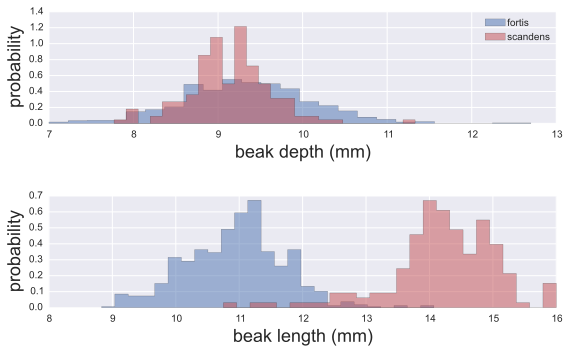

In [18]:
# Pull out data for histogram plotting
bd_fortis = \
    df[(df['species']=='fortis') & (df['year']==1987)]['beak depth (mm)'].values
bd_scandens = \
  df[(df['species']=='scandens') & (df['year']==1987)]['beak depth (mm)'].values
    
bl_fortis = \
    df[(df['species']=='fortis') & (df['year']==1987)]['beak length (mm)'].values
bl_scandens = \
  df[(df['species']=='scandens') & (df['year']==1987)]['beak length (mm)'].values

# Set up figure
fig, ax = plt.subplots(2, 1, figsize=(8, 5))

# Plot beak depth histograms
_ = ax[0].hist(bd_fortis, bins=25, histtype='stepfilled', alpha=0.5, normed=True)
_ = ax[0].hist(bd_scandens, bins=25, histtype='stepfilled', alpha=0.5, 
               normed=True, color=sns.color_palette()[2])

# Plot beak length histograms
_ = ax[1].hist(bl_fortis, bins=25, histtype='stepfilled', alpha=0.5, normed=True)
_ = ax[1].hist(bl_scandens, bins=25, histtype='stepfilled', alpha=0.5, 
               normed=True, color=sns.color_palette()[2])

# Legends and axis labels, tidying
ax[0].legend(('fortis', 'scandens'), loc='upper right')
ax[0].set_xlabel('beak depth (mm)')
ax[0].set_ylabel('probability')
ax[1].set_ylabel('probability')
ax[1].set_xlabel('beak length (mm)')
fig.tight_layout(h_pad=3)

There is apparently no phenotypic difference in beak depth, but there is a striking difference in beak length, with *Geospiza scandens* having longer beaks.

Note that a quick-and-dirty way to do this is to use the built-in histogram method of `DataFrame`s.

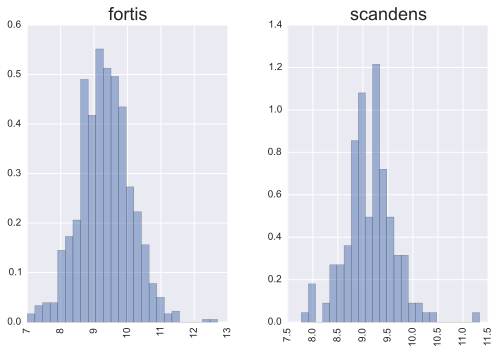

In [19]:
ax = df[df['year']==1987].hist('beak depth (mm)', by='species', normed=True,
                               alpha=0.5, bins=25)

**e)** Now let's make a plot of the 1987 data in the beak depth-beak length plane.

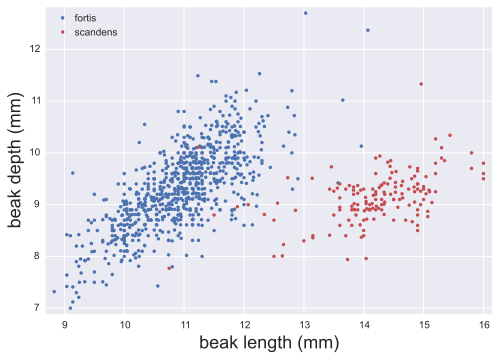

In [20]:
# Extract data we want
df_fortis = df[(df['year']==1987) & (df['species']=='fortis')]
df_scandens = df[(df['year']==1987) & (df['species']=='scandens')]

# Plot the result
plt.plot(df_fortis['beak length (mm)'], df_fortis['beak depth (mm)'],
         marker='.', linestyle='None', color=sns.color_palette()[0], alpha=0.5)
plt.plot(df_scandens['beak length (mm)'], df_scandens['beak depth (mm)'],
         marker='.', linestyle='None', color=sns.color_palette()[2], alpha=0.5)

# Clean up
plt.margins(0.02)
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('fortis', 'scandens'), loc='upper left')

**f)** To generate all of the plots, we can loop through and generate a plot like we have above.  It is easiest to write a function to make the plot on a given set of axes.

In [21]:
def plot_beak_data(ax, df, year, legend=False):
    """
    Plot beak length and beak depth data for a given year
    on a given axis.
    """

    # Extract data we want
    df_fortis = df[(df['year']==year) & (df['species']=='fortis')]
    df_scandens = df[(df['year']==year) & (df['species']=='scandens')]


    # Plot the result
    ax.plot(df_fortis['beak length (mm)'], df_fortis['beak depth (mm)'],
            marker='.', linestyle='None', color=sns.color_palette()[0], 
            alpha=0.5)
    ax.plot(df_scandens['beak length (mm)'], df_scandens['beak depth (mm)'],
            marker='.', linestyle='None', color=sns.color_palette()[2], 
            alpha=0.5)

    # Clean up
    ax.margins(0.02)
    ax.set_xlabel('beak length (mm)', fontsize=12)
    ax.set_ylabel('beak depth (mm)', fontsize=12)
    ax.set_title(str(year), fontsize=14)
    if legend:
        ax.legend(('fortis', 'scandens'), loc='upper left')
    
    return ax

Now, we'll lay out a figure and make the plots.

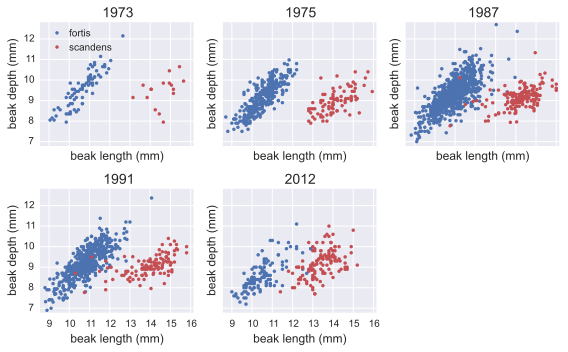

In [22]:
# Plots playout
fig, ax = plt.subplots(2, 3, figsize=(8, 5), sharex=True, sharey=True)

# Which axes to use
ax_inds = ((0,0), (0, 1), (0,2), (1,0), (1, 1))

# Loop through years and make plots
for i, year in enumerate(years):
    if i == 0:
        legend = True
    else:
        legend=False
        
    _ = plot_beak_data(ax[ax_inds[i]], df, year, legend=legend)
    
# Tidy up
ax[1, 2].axis('off')
fig.tight_layout()

When we look at the data this way, we see the the species coming together.

## Problem 4.3: Mapping Protein to Nucleotide Sequences

The public sequence databases do an excellent job of connecting protein sequences with each other and other *metadata*, like sequence homology families, 3d structures, etc. However, the protein sequence databases have been structured such that nucleotide coding sequence is divorced from the protein sequence in the databases. Neither the Uniprot webpage nor the associated NCBI protein webpages for the same sequence provide a direct link to the coding sequence.  Uniprot acknolwedges this issue but has no plans to change. (See [here](http://www.uniprot.org/help/canonical_nucleotide).)

Here, let's explore two methods to map a protein sequence to its nucleotide coding sequence.

***a)*** *Use a BLAST program to search for the E. coli MscK coding nucleotide sequence given by the identifier [P77338](http://www.uniprot.org/uniprot/P77338). Provide justification for the program you use and how you identify the hit.  Can you be sure that the hit corresponds to the coding sequence and not one that has silent mutations, e.g., same protein sequence but different mRNA sequence?*


tBLASTn is perfectly suited to this problem. We have a protein sequence and would like to find it's nucleotide counterpart somewhere hidden in the sequences databases.

We need to

1. Query NCBI for the protein sequence, say using `Bio.Entrez.EFetch`
2. Run a tBLASTn with this sequence

In [8]:
#1. Query NCBI for protein sequence using the given identifier
Bio.Entrez.email = 'saladi@caltech.edu'
Bio.Entrez.tool = "Protein-to-Nucleotide-MscK"


handle = Bio.Entrez.efetch(db='protein', id= 'P77338', rettype='gb', retmode='text')
seq_record = Bio.SeqIO.read(handle, 'genbank')
handle.close()

print(seq_record)

ID: P77338.1
Name: MSCK_ECOLI
Description: RecName: Full=Mechanosensitive channel MscK; AltName: Full=Potassium efflux system KefA; Flags: Precursor.
Number of features: 37
/data_file_division=BCT
/keywords=['Cell inner membrane', 'Cell membrane', 'Coiled coil', 'Complete proteome', 'Ion transport', 'Membrane', 'Potassium', 'Potassium transport', 'Reference proteome', 'Signal', 'Transmembrane', 'Transmembrane helix', 'Transport']
/source=Escherichia coli K-12
/accessions=['P77338']
/date=22-JUL-2015
/references=[Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...), Reference(title='The complete genome sequence of Escherichia coli K-12', ...), Reference(title='Highly accurate genome sequences of Escherichia coli K-12 strains MG1655 and W3110', ...), Reference(title='Protection of Escherichia coli cells against extreme turgor by activation of MscS and MscL mechanosensitive channels: identification of genes required for MscS activity', ...), Reference(title

Look's like we've successfully retrieved our protein sequence!

Since we are only looking for exact matches, I've lowered the E-value threshold and the number of alignments to return. We likely are only interested in the first result. To further decrease the time the execution time, I've specified the taxonomic identifier that corresponds to [*Escherichia coli* K12](http://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?lvl=0&amp;id=83333).

In [20]:
# tblastn searches a translated nucleotide database given a protein sequence query
# 'nt' is the non-redundant nucleotide database
result_handle = Bio.Blast.NCBIWWW.qblast('tblastn', 'nt', seq_record.seq,
                                        alignments=50,
                                        expect=1e-8,
                                        entrez_query="txid83333[ORGN]")

# write result to file before interpreting
with open('tblastn-nt-P77338.xml', 'w') as save_file:
    save_file.write(result_handle.read())

result_handle.close()

In [21]:
!ls -l tblastn-nt-P77338.xml
!echo
!head tblastn-nt-P77338.xml

-rw-r--r--  1 saladi  staff  216134 Sep 17 18:42 tblastn-nt-P77338.xml

<?xml version="1.0"?>
<!DOCTYPE BlastOutput PUBLIC "-//NCBI//NCBI BlastOutput/EN" "http://www.ncbi.nlm.nih.gov/dtd/NCBI_BlastOutput.dtd">
<BlastOutput>
  <BlastOutput_program>tblastn</BlastOutput_program>
  <BlastOutput_version>TBLASTN 2.2.32+</BlastOutput_version>
  <BlastOutput_reference>Stephen F. Altschul, Thomas L. Madden, Alejandro A. Sch&amp;auml;ffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), &quot;Gapped BLAST and PSI-BLAST: a new generation of protein database search programs&quot;, Nucleic Acids Res. 25:3389-3402.</BlastOutput_reference>
  <BlastOutput_db>nt</BlastOutput_db>
  <BlastOutput_query-ID>Query_130769</BlastOutput_query-ID>
  <BlastOutput_query-def>unnamed protein product</BlastOutput_query-def>
  <BlastOutput_query-len>1120</BlastOutput_query-len>


Let's now parse the output file using `Bio.SearchIO`.

In [22]:
blast_qresult = Bio.SearchIO.read('tblastn-nt-P77338.xml', 'blast-xml')
print(blast_qresult)

Program: tblastn (2.2.32+)
  Query: unnamed (1120)
         protein product
 Target: nt
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      3  gi|808732710|gb|CP010445.1|  Escherichia coli K-12 stra...
            1      3  gi|808728347|gb|CP010444.1|  Escherichia coli K-12 stra...
            2      3  gi|808720026|gb|CP010443.1|  Escherichia coli K-12 stra...
            3      3  gi|808715606|gb|CP010442.1|  Escherichia coli K-12 stra...
            4      3  gi|808711242|gb|CP010441.1|  Escherichia coli K-12 stra...
            5      3  gi|808706883|gb|CP010440.1|  Escherichia coli K-12 stra...
            6      3  gi|808702513|gb|CP010439.1|  Escherichia coli K-12 stra...
            7      3  gi|808698133|gb|CP010438.1|  Escherichia coli K-12 stra...
            8      3  gi|802133627|emb|LN832404.1|  Escherichia

Let's print the top hit.

In [24]:
print(blast_qresult[0][0])

      Query: unnamed protein product
        Hit: gi|808732710|gb|CP010445.1| Escherichia coli K-12 strain ER3435,...
Query range: [0:1120] (0)
  Hit range: [1299662:1303022] (1)
Quick stats: evalue 0; bitscore 2278.44
  Fragments: 1 (1120 columns)
     Query - MTMFQYYKRSRHFVFSAFIAFVFVLLCQNTAFARASSNGDLPTKADLQAQLDSLNKQKD~~~TPAVG
             MTMFQYYKRSRHFVFSAFIAFVFVLLCQNTAFARASSNGDLPTKADLQAQLDSLNKQKD~~~TPAVG
       Hit - MTMFQYYKRSRHFVFSAFIAFVFVLLCQNTAFARASSNGDLPTKADLQAQLDSLNKQKD~~~TPAVG


Looks like it's an exact match, so let's accept it and print the necessary information to identify the nucleotide sequence and then retrieve the corresponding nucleotide sequence via Efetch.

In [33]:
print("identifier:", blast_qresult[0][0].hit.id)
print("location:", blast_qresult[0][0].hit_range[0], "-", blast_qresult[0][0].hit_range[1])

identifier: gi|808732710|gb|CP010445.1|
location: 1299662 - 1303022


As you can see from the BLAST results, there are a number of nucleotide sequences that are exact matches from different *E. coli* genomes. Without further information, it's impossible to identify which one corresponds to the coding sequence of the MscK protein sequence given.

***b)*** *Use NCBI's Entrez service(s) to retrieve the MscK coding sequence *without* using BLAST!*

*- Hint 1: What does the CDS feature in a Genbank file give you?*

*- Hint 2: You will need to do more than one Entrez operation.*

We need to query NCBI for the genbank record corresponding to MscK with the given identifier and then parse the record to identify any relevant information that would help us map to the genome sequence.

Luckily, there is a feature `xrefs` that holds for "cross-reference" database information. We can query NCBI Entrez for each of these Genbank records, one by one, to see if we can find a coding sequence feature that matches the MscK protein sequence. Once we do, we can claim victory and be finished!

In [104]:
#1. Query NCBI for protein sequence using the given identifier
handle = Bio.Entrez.efetch(db='protein', id='P77338', rettype='gb', retmode='text')
prot_record = Bio.SeqIO.read(handle, 'genbank')
handle.close()

print(prot_record)

ID: P77338.1
Name: MSCK_ECOLI
Description: RecName: Full=Mechanosensitive channel MscK; AltName: Full=Potassium efflux system KefA; Flags: Precursor.
Number of features: 37
/data_file_division=BCT
/keywords=['Cell inner membrane', 'Cell membrane', 'Coiled coil', 'Complete proteome', 'Ion transport', 'Membrane', 'Potassium', 'Potassium transport', 'Reference proteome', 'Signal', 'Transmembrane', 'Transmembrane helix', 'Transport']
/source=Escherichia coli K-12
/accessions=['P77338']
/date=22-JUL-2015
/references=[Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...), Reference(title='The complete genome sequence of Escherichia coli K-12', ...), Reference(title='Highly accurate genome sequences of Escherichia coli K-12 strains MG1655 and W3110', ...), Reference(title='Protection of Escherichia coli cells against extreme turgor by activation of MscS and MscL mechanosensitive channels: identification of genes required for MscS activity', ...), Reference(title

From this, it's that there are a large number of annotations and under `db_source` there are identifiers that might correspond to a other databases, but the organization isn't entirely clear. Let's use the `dir()` function to get a better idea of the structure of the data within this `SeqRecord` object.

In [105]:
dir(prot_record)

['__add__',
 '__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_per_letter_annotations',
 '_seq',
 '_set_per_letter_annotations',
 '_set_seq',
 'annotations',
 'dbxrefs',
 'description',
 'features',
 'format',
 'id',
 'letter_annotations',
 'lower',
 'name',
 'reverse_complement',
 'seq',
 'upper']

`description`, `dbxrefs`, and `annotations` fields all look promising. Let's go through each to see which one holds the cross-references.

In [106]:
print("description:", prot_record.description, sep="\t")
print("dbxrefs:", prot_record.dbxrefs, sep="\t")
print("annotations:", prot_record.annotations, sep="\t")

description:	RecName: Full=Mechanosensitive channel MscK; AltName: Full=Potassium efflux system KefA; Flags: Precursor.
dbxrefs:	[]
annotations:	{'data_file_division': 'BCT', 'keywords': ['Cell inner membrane', 'Cell membrane', 'Coiled coil', 'Complete proteome', 'Ion transport', 'Membrane', 'Potassium', 'Potassium transport', 'Reference proteome', 'Signal', 'Transmembrane', 'Transmembrane helix', 'Transport'], 'source': 'Escherichia coli K-12', 'accessions': ['P77338'], 'date': '22-JUL-2015', 'references': [Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...), Reference(title='The complete genome sequence of Escherichia coli K-12', ...), Reference(title='Highly accurate genome sequences of Escherichia coli K-12 strains MG1655 and W3110', ...), Reference(title='Protection of Escherichia coli cells against extreme turgor by activation of MscS and MscL mechanosensitive channels: identification of genes required for MscS activity', ...), Reference(title='Io

The `annotations` field definately holds the cross-references necessary to map to nucleotide sequences. It looks like a dictionary. Let's confirm:

In [107]:
print(prot_record.annotations.keys())

dict_keys(['data_file_division', 'keywords', 'source', 'accessions', 'date', 'references', 'gi', 'taxonomy', 'comment', 'db_source', 'sequence_version', 'organism'])


`db_source` looks promising. Let's print it specifically:

In [108]:
print(prot_record.annotations['db_source'])

UniProtKB: locus MSCK_ECOLI, accession P77338; class: standard. extra accessions:Q2MBW2 created: Nov 1, 1997. sequence updated: Feb 1, 1997. annotation updated: Jul 22, 2015. xrefs: Y07802.1, CAA69140.1, U82664.1, AAB40219.1, U00096.3, AAC73567.1, AP009048.1, BAE76244.1, H64776, NP_414998.1, WP_000177732.1 xrefs (non-sequence databases): ProteinModelPortal:P77338, SMR:P77338, DIP:DIP-10070N, IntAct:P77338, STRING:511145.b0465, TCDB:1.A.23.1.1, PaxDb:P77338, PRIDE:P77338, EnsemblBacteria:AAC73567, EnsemblBacteria:AAC73567, EnsemblBacteria:b0465, EnsemblBacteria:BAE76244, EnsemblBacteria:BAE76244, EnsemblBacteria:BAE76244, GeneID:945132, KEGG:eco:b0465, PATRIC:32116083, EchoBASE:EB3991, EcoGene:EG14240, eggNOG:COG3264, HOGENOM:HOG000280842, InParanoid:P77338, KO:K05802, OMA:LHTPKAI, OrthoDB:EOG6J1DC5, PhylomeDB:P77338, BioCyc:EcoCyc:G6255-MONOMER, BioCyc:ECOL316407:JW0454-MONOMER, PRO:PR:P77338, Proteomes:UP000000318, Proteomes:UP000000625, GO:0016021, GO:0005886, GO:0071470, GO:0009992,

This looks like a dictionary, so let's check it's type:

In [111]:
type(prot_record.annotations['db_source'])

str

Nope, it's just a string. How about we use a regex to capture the identifiers between `xrefs:` and `xrefs (` and then separate the captured string into tokens using the commas?

In [112]:
between_xrefs = re.compile('xrefs:(.*)xrefs')

xrefs = between_xrefs.findall(prot_record.annotations['db_source'])

#results returned in a list, so just capture the first entry
xrefs = xrefs[0]

# remove the extra spaces
xrefs = xrefs.replace(' ', '')

# seperate into 
xrefs = xrefs.split(',')

print(xrefs)

['Y07802.1', 'CAA69140.1', 'U82664.1', 'AAB40219.1', 'U00096.3', 'AAC73567.1', 'AP009048.1', 'BAE76244.1', 'H64776', 'NP_414998.1', 'WP_000177732.1']


Now that we have a list of accession numbers to work with, let's create a method that searches a retrieved sequence for a string of interest (in our case, that of MscK, `P77338`).

Before we do that, we need to write a set of helper functions that will check the nucleotide sequence for the protein sequence of interest. We can do this in two ways -- by doing the 6-frame translation or by mapping through identifiers. I've written methods for both here:

In [160]:
def six_frame_translation(nuc_seq):
    """
    This function calculates the 6 frame translation of a given nucleotide sequence
    It returns nucleotide sequence and it's translation as tuples of a tuple
    """
    rev_comp = nuc_seq.reverse_complement()
    
    return ((nuc_seq, nuc_seq.translate()),
            (nuc_seq[1:], nuc_seq[1:].translate()),
            (nuc_seq[2:], nuc_seq[2:].translate()),
            (rev_comp, rev_comp.translate()),
            (rev_comp[1:], rev_comp[1:].translate()),
            (rev_comp[2:], rev_comp[2:].translate()))


def get_by_translation(nuc_record, prot_record):
    """
    This function checks the 6-frame translation of a nucleotide record for 
    a protein record of interest.
    If found, it returns the coding sequence, if not, it returns `None`
    """
    
    for i, item in enumerate(six_frame_translation(nuc_record.seq)):
        (nuc, prot) = item
        
        start_idx = prot.find(prot_record.seq)
        
        # do this, if we find the protein of interest in the translated sequence
        if start_idx != -1:
            # calculate start position in codons
            start_idx *= 3
            
            # count positions starting from `start` + 
            # length of codons of protein sequence + 
            # 3 for stop codon
            stop_idx = start_idx + len(prot_record.seq)*3+3
            # return the relevant record
            return nuc[start_idx:stop_idx]

    # if no sequence was found
    return None


def get_by_id(nuc_record, prot_record):
    """
    This function looks for a protein sequence in a nucleotide record
    by first looking for the protein sequence identifier in the nucleotide record
    and then by translating that feature to check if it matches that of the
    given protein record.
    """
    # iterate through the features within the nucleotide record
    for feat in nuc_record.features:
        # check the db_xref qualifer of each feature for the original identifier
        for xref in feat.qualifiers.get('db_xref', None):
                # check to make sure the translation matches the protein of interest
                if prot_record.id in xref and \
                    prot_record.seq == feat.qualifiers.get('translation', None):
                    # if so, return the location specified by the feature
                    return feat.extract(nuc_record)
                
    # if no sequence was found
    return None

Now, let's implement them!

In [168]:
i = 0
cds_seq = None
# iterate through xrefs looking for one with the original identifier in the record.    

while cds_seq is None and i < len(xrefs):
    accn = xrefs[i]
    # retrieve record for current xref, i
    handle = Bio.Entrez.efetch(db='nuccore', id=accn, rettype='gb', retmode='text')
    
    # read handle into a sequence record
    nuc_record = Bio.SeqIO.read(handle, 'genbank')
    
    # Don't forget to close the sequence record!
    handle.close()
    
    # check if the retrieved record for the protein sequence of interest
    cds_seq = get_by_translation(nuc_record, prot_record)

    # increment the index in case we need to check another sequence
    i += 1
    
# set up a new sequence record and print the nucleotide sequence in FASTA format
cds_record = Bio.SeqRecord.SeqRecord(id = prot_record.id,
                      description = "Coding Nucleotide Sequence from " + nuc_record.id,
                      seq = cds_seq)
print(cds_record.format('fasta'))

>P77338.1 Coding Nucleotide Sequence from Y07802.1
ATGACTATGTTCCAGTATTACAAACGATCACGGCATTTTGTTTTTTCAGCATTTATTGCT
TTTGTTTTTGTCTTGTTATGCCAGAACACGGCGTTTGCGCGGGCGTCATCGAATGGTGAT
CTGCCGACAAAAGCGGACCTGCAGGCGCAACTTGACTCACTAAATAAACAAAAAGATCTT
TCTGCTCAGGACAAACTGGTGCAGCAGGATCTGACAGATACATTAGCCACCCTCGATAAA
ATCGATCGCATAAAAGAAGAGACAGTTCAGCTACGGCAAAAAGTCGCTGAAGCGCCGGAA
AAAATGCGCCAGGCGACCGCGGCGTTAACAGCACTTAGCGATGTCGATAACGACGAAGAA
ACGCGCAAAATTCTGAGCACGCTGTCGTTGCGCCAGCTGGAAACTCGCGTTGCCCAGGCG
CTGGACGATTTGCAAAACGCACAAAACGATCTGGCGTCTTATAACAGCCAGCTGGTTTCG
TTACAGACGCAGCCCGAACGCGTGCAAAATGCGATGTATAACGCTTCGCAGCAGCTGCAA
CAAATTCGCAGTCGTCTGGATGGGACTGATGTCGGCGAGACAGCCTTACGTCCCAGCCAG
AAAGTGTTAATGCAGGCCCAGCAGGCGTTGCTGAATGCGGAGATTGACCAGCAGCGTAAA
AGCCTGGAAGGGAACACCGTCTTGCAGGATACCTTGCAAAAGCAACGTGATTACGTGACG
GCGAACAGCGCTCGTCTGGAGCACCAGTTACAACTGTTGCAAGAAGCGGTAAACAGCAAG
CGCCTGACTTTAACCGAAAAAACGGCGCAGGAAGCCGTCTCCCCGGATGAAGCCGCGCGT
ATTCAGGCTAATCCGCTGGTGAAGCAGGAACTGGAAATTAACCAGCAGTTAAGTCAGCGT
CTGATTACCGCGACTGAAAACGGTAATCAGTTGA

/Users/saladi/anaconda3/lib/python3.4/site-packages/Bio/Seq.py:2040: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


<center>
**Success!**
</center>

*Surprise!* One of the lead developers of Biopython, [Peter Cock](http://www.hutton.ac.uk/staff/peter-cock), wrote a script to do this taking into account slicing in Eukaryotic genes. Take a look [here](http://biopython.org/pipermail/biopython/2009-January/004886.html). You can use the code given here or that script so that the input/output fits your needs.

Remember, when you code, you're not alone! It's you, Python, and Google!

***c)*** *Compare and contrast the two methods. What are the advantages/disadvantages of each?*

**a)** The first method using tBLASTn is more straightforward to write but takes longer to complete for each query sequence. It also does not guarentee that the sequence retrieved corresponds to exact nucleotide coding sequence of the protein of interest. In fact, if there are sequenced genomes from organisms closely-related to that of the protein of interest, it's very possible that the nucleotide sequence retrieved will have silent mutations with repect to the one of interest.

Depending on how one uses this information, this may or may not be an issue. If you are trying to clone a gene for biochemical work following the methods in a paper using the protein accession number the authors report, having an incorrect nucleotide sequence might be an issue. If you are simply trying to find the sequence to amplify from a genomic stock or synthesize yourself, perhaps, this difference might not be an issue.


**b)** The Entrez method is rather tedious, I know, but it provides a somewhat greater guarantee that the coding sequence mapped corresponds to that of the gene of interest since we are traversing linked identifiers. However, once this code is written, it can be reused many times.